In [213]:
!git clone https://github.com/ourownstory/neural_prophet

fatal: destination path 'neural_prophet' already exists and is not an empty directory.


In [ ]:
!pip install neural_prophet/.

In [ ]:
!pip uninstall -y torch notebook notebook_shim tensorflow tensorflow-datasets prophet torchaudio torchdata torchtext torchvision

In [214]:
from neuralprophet import NeuralProphet# Import necessary libraries
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
#import matplotlib.pyplot as plt

In [215]:
'''data = pd.read_csv("all.csv")
data["Call Date"] = pd.to_datetime(data["Call Date"])
result = data.groupby('Call Date').nunique().reset_index().sort_values(by='Call Date')
df = result.copy()[["Call Date", "Call Number"]]
'''


WARNING - (py.warnings._showwarnmsg) - /var/folders/yk/qg5wffwx34v9_s9yt694z1400000gn/T/ipykernel_18264/4200926960.py:1: DtypeWarning:

Columns (19,20,25,30) have mixed types. Specify dtype option on import or set low_memory=False.




In [252]:
df = pd.read_csv("allcounts.csv")
df

,Unnamed: 0,Call Date,Call Number
0,0,2000-04-13,252
1,1,2000-04-14,319
2,2,2000-04-15,286
3,3,2000-04-16,303
4,4,2000-04-17,309
...,...,...,...
8630,8630,2023-12-01,532
8631,8631,2023-12-02,499
8632,8632,2023-12-03,473
8633,8633,2023-12-04,495


In [255]:
train, test = df.iloc[:6600], df.iloc[6600:]
p_data = train[["Call Date", "Call Number"]]
p_data = p_data.rename(columns = {"Call Date": "ds", "Call Number": "y"})
p_test = test[["Call Date", "Call Number"]]
p_test = p_test.rename(columns = {"Call Date": "ds", "Call Number": "y"})

In [316]:
m = NeuralProphet(weekly_seasonality=7, yearly_seasonality = 20,
    trend_reg=1,
    n_lags= 14,
    ar_layers=[32, 64, 32, 2],
    learning_rate=0.01, epochs = 50, batch_size = 64, n_forecasts = 1, optimizer = "SGD")
#m.set_plotting_backend("plotly-static")  # show plots correctly in jupyter notebooks
metrics = m.fit(p_data)


INFO - (NP.config.__post_init__) - Note: Trend changepoint regularization is experimental.
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.985% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.


Training: 0it [00:00, ?it/s]

In [317]:
#forecast = m.predict(p_test)
forecast = m.predict(p_test.iloc[15:1000])
#forecast = m.predict(p_data)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.797% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.797% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.data.processing._handle_missing_data) - Added 2 missing dates.
INFO - (NP.data.processing._handle_missing_data) - Dropped 1 rows at the end with NaNs in 'y' column.
WARNING - (NP.data.processing._handle_missing_data) - 2 missing values in column y were detected in total. 
INFO - (NP.data.processing._handle_missing_data) - 2 NaN values in column y were auto-imputed.


Predicting: 103it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


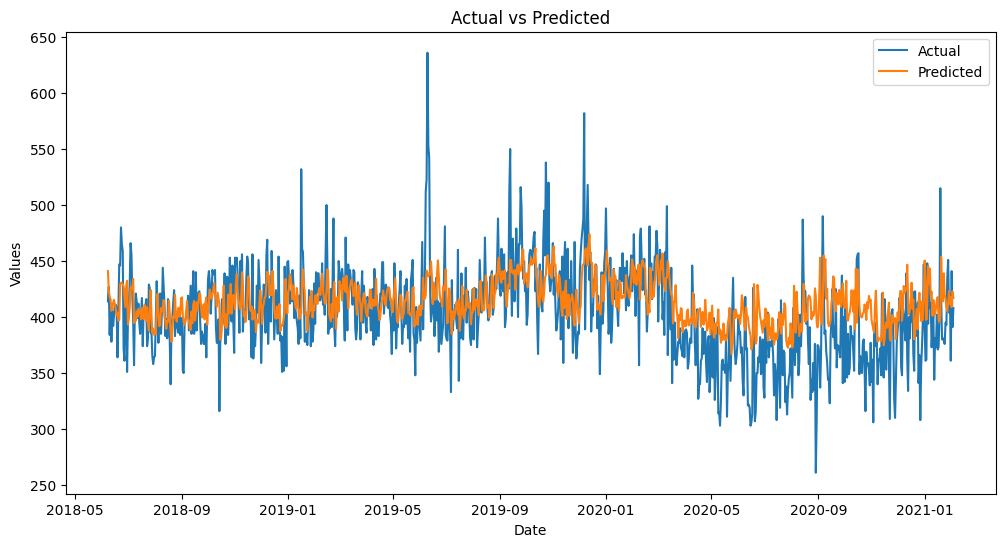

In [318]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing your data
# You can create the DataFrame like this:
# df = pd.DataFrame({your_data_here})

# Convert the 'ds' column to datetime
forecast['ds'] = pd.to_datetime(forecast['ds'])
forecast = forecast.dropna().iloc[1:]

# Plot y and y_hat against the date
plt.figure(figsize=(12, 6))
plt.plot(forecast['ds'], forecast['y'], label='Actual')
plt.plot(forecast['ds'], forecast['yhat1'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [315]:
import numpy as np
myforecast = forecast.dropna()
RSS = np.sum((myforecast["yhat1"] - myforecast["y"])**2)
TSS = np.sum((np.mean(myforecast["y"]) - myforecast["y"])**2)
1 - RSS/TSS

0.2965354636456592